
# Final Project

## Objective
The goal of this project is to scrape data from [Box.Live](https://box.live/boxers/) to extract comprehensive information about boxers, including their general characteristics and fight records. After collecting the data, the project will focus on analyzing the dataset to derive meaningful insights and conducting predictive analysis to estimate the likelihood of future _win rate_.

## Procedures
1. **Web Scraping**
  - Checking with one boxer's data
  - Generalizing to all boxers

2. **Data Cleaning**
  - Removing redundant texts and dropping invalid records
  - Converting `str` to int for analysis purposes

3. **Analysis**
  - Various analytics Within the scope of dataset
  - Prediction of wins

4. **Summary**

In [7]:
# !pip install scrapethat

In [92]:
import pandas as pd
import numpy as np
from scrapethat import *
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio

<hr>

## 1. Web Scraping

### Checking with one boxer

In [9]:
t = read_cloud('https://box.live/boxers/kudratillo-abdukakhorov/')

In [10]:
t.select('.table-responsive')

[<table class="table table-responsive">
 <caption style="caption-side: top; font-weight: bold; font-size: 1.2rem; margin-top: 1rem;">Kudratillo Abdukakhorov Stats</caption>
 <thead>
 <tr>
 <th>Age</th><th>Date Of Birth</th><th>Nationality</th><th>Height</th><th>Reach</th><th>Stance</th><th>Weight Division</th> </tr>
 </thead>
 <tbody>
 <tr><td>31</td><td>August 29, 1993</td><td>Uzbekistan</td><td>177 cm</td><td>171 cm</td><td>orthodox</td><td>Super Welterweight (154 lb)</td></tr> </tbody>
 </table>,
 <table class="table table-responsive">
 <caption style="caption-side: top; font-weight: bold; font-size: 1.2rem; margin-top: 1rem;">Kudratillo Abdukakhorov Record</caption>
 <thead>
 <tr>
 <th>Professional Record</th><th>Wins</th><th>Wins By KO</th><th>Knockout Percentage</th><th>Losses</th><th>Losses By Stoppage</th><th>Draws</th><th>Pro Rounds</th><th>Debut</th> </tr>
 </thead>
 <tbody>
 <tr><td>20-4-0</td><td>20</td><td>12</td><td>60%</td><td>4</td><td>0</td><td>0</td><td>168</td><td>20

### Extracting Stat data of the boxer

In [11]:
stats_table = t.select('.table-responsive')[0]

caption = stats_table.select_one('caption')
name = caption.text.split(' ')[0:2]
name = ' '.join(name)

stats = {'Name': name}

stats_headers = [th.text.strip() for th in stats_table.select('th')]

stats_data = [td.text.strip() for td in stats_table.select('td')]

characteristics = dict(zip(stats_headers, stats_data))

stats.update(characteristics)

stats

{'Name': 'Kudratillo Abdukakhorov',
 'Age': '31',
 'Date Of Birth': 'August 29, 1993',
 'Nationality': 'Uzbekistan',
 'Height': '177 cm',
 'Reach': '171 cm',
 'Stance': 'orthodox',
 'Weight Division': 'Super Welterweight (154 lb)'}

### Extracting Record data of the boxer

In [12]:
record_table = t.select('.table-responsive')[1]

record_headers = [th.text.strip() for th in record_table.select('th')]

record_data = [td.text.strip() for td in record_table.select('td')]

record = dict(zip(record_headers, record_data))

record

{'Professional Record': '20-4-0',
 'Wins': '20',
 'Wins By KO': '12',
 'Knockout Percentage': '60%',
 'Losses': '4',
 'Losses By Stoppage': '0',
 'Draws': '0',
 'Pro Rounds': '168',
 'Debut': '2015'}

### Creating a dataframe out of both data of boxer to have a combined info

In [13]:
info = {
    'Name': stats['Name'],
    'Nationality': [stats['Nationality']],
    'Age': [stats['Age']],
    'Height': [stats['Height']],
    'Stance': [stats['Stance']],
    'Weight Division': [stats['Weight Division']],
    'Wins': [record['Wins']],
    'Wins By KO': [record['Wins By KO']],
    'Knockout Percentage': [record['Knockout Percentage']],
    'Losses': [record['Losses']],
    'Draws': [record['Draws']],
    'Debut': [record['Debut']]
}

boxer_info = pd.DataFrame(info)
boxer_info

,Name,Nationality,Age,Height,Stance,Weight Division,Wins,Wins By KO,Knockout Percentage,Losses,Draws,Debut
0,Kudratillo Abdukakhorov,Uzbekistan,31,177 cm,orthodox,Super Welterweight (154 lb),20,12,60%,4,0,2015


<hr>

### Moving to generalization of the above method to all boxers

### Getting all links of individual boxers

In [14]:
pages = read_cloud('https://box.live/boxers/')

all_links = [x['href'] for x in pages.select('.text-capitaliz')]

all_links

['https://box.live/boxers/kudratillo-abdukakhorov/',
 'https://box.live/boxers/masood-abdulah/',
 'https://box.live/boxers/zaur-abdullaev/',
 'https://box.live/boxers/arthur-abraham/',
 'https://box.live/boxers/tomasz-adamek/',
 'https://box.live/boxers/carlos-adames/',
 'https://box.live/boxers/brandon-adams/',
 'https://box.live/boxers/david-adeleye/',
 'https://box.live/boxers/joseph-adorno/',
 'https://box.live/boxers/caoimhin-agyarko/',
 'https://box.live/boxers/efe-ajagba/',
 'https://box.live/boxers/artur-akavov/',
 'https://box.live/boxers/murodjon-akhmadaliev/',
 'https://box.live/boxers/batyr-akhmedov/',
 'https://box.live/boxers/ali-akhmedov/',
 'https://box.live/boxers/seigo-yuri-akui/',
 'https://box.live/boxers/gabriela-celeste-alaniz/',
 'https://box.live/boxers/raeese-aleem/',
 'https://box.live/boxers/jevgenijs-aleksejevs/',
 'https://box.live/boxers/devon-alexander/',
 'https://box.live/boxers/chris-algieri/',
 'https://box.live/boxers/sadam-ali/',
 'https://box.live/

### Function to extract relevant info about individual boxer

In [15]:
def boxer_info_extract(page_url):

    try:
        t = read_cloud(page_url)

        t.select('.table-responsive')

        stats_table = t.select('.table-responsive')[0]

        # Extracting the Name of the Boxer
        caption = stats_table.select_one('caption')
        name = caption.text.split(' ')[0:2]
        name = ' '.join(name)

        stats = {'Name': name}

        # Boxer's characteristics
        stats_headers = [th.text.strip() for th in stats_table.select('th')]

        stats_data = [td.text.strip() for td in stats_table.select('td')]

        characteristics = dict(zip(stats_headers, stats_data))

        stats.update(characteristics)

        # Boxer's Record
        record_table = t.select('.table-responsive')[1]

        record_headers = [th.text.strip() for th in record_table.select('th')]

        record_data = [td.text.strip() for td in record_table.select('td')]

        record = dict(zip(record_headers, record_data))

        # Combining into a dataframe choosing necessary characteristics
        info = {
        'Name': stats['Name'],
        'Nationality': stats['Nationality'],
        'Age': stats['Age'],
        'Height': stats['Height'],
        'Stance': stats['Stance'],
        'Weight Division': stats['Weight Division'],
        'Wins': record['Wins'],
        'Wins By KO': record['Wins By KO'],
        'Knockout Percentage': record['Knockout Percentage'],
        'Losses': record['Losses'],
        'Draws': record['Draws'],
        'Debut': record['Debut']
        }

        return info

    except:
        return {}

### Extending to all links

In [16]:
all_boxers = []

all_boxers.extend([boxer_info_extract(link) for link in all_links])

In [17]:
boxers_data = pd.DataFrame(all_boxers)

In [18]:
boxers_data

,Name,Nationality,Age,Height,Stance,Weight Division,Wins,Wins By KO,Knockout Percentage,Losses,Draws,Debut
0,Kudratillo Abdukakhorov,Uzbekistan,31,177 cm,orthodox,Super Welterweight (154 lb),20,12,60%,4,0,2015
1,Masood Abdulah,United Kingdom,31,170 cm,orthodox,Featherweight (126 lb),11,7,64%,0,0,2021
2,Zaur Abdullaev,Russian Federation,30,175 cm,orthodox,Lightweight (135 lb),20,12,60%,1,0,2017
3,Arthur Abraham,Armenia,44,175 cm,orthodox,Super Middleweight (168 lb),47,30,64%,6,0,2003
4,Tomasz Adamek,Poland,48,187 cm,orthodox,Heavyweight (200+ lb),53,31,58%,6,0,1999
...,...,...,...,...,...,...,...,...,...,...,...,...
865,Zhanat Zhakiyanov,Kazakhstan,41,170 cm,orthodox,Bantamweight (118 lb),27,18,67%,2,0,2007
866,Zhilei Zhang,China,41,198 cm,southpaw,Heavyweight (200+ lb),27,22,81%,2,1,2014
867,Dejan Zlaticanin,Montenegro,40,163 cm,southpaw,Super Lightweight (140 lb),24,16,67%,4,0,2008
868,Ellis Zorro,United Kingdom,32,193 cm,orthodox,Cruiserweight (200 lb),17,7,41%,2,0,2017


In [19]:
boxers_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 870 entries, 0 to 869
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Name                 870 non-null    object
 1   Nationality          870 non-null    object
 2   Age                  870 non-null    object
 3   Height               870 non-null    object
 4   Stance               870 non-null    object
 5   Weight Division      870 non-null    object
 6   Wins                 870 non-null    object
 7   Wins By KO           870 non-null    object
 8   Knockout Percentage  870 non-null    object
 9   Losses               870 non-null    object
 10  Draws                870 non-null    object
 11  Debut                870 non-null    object
dtypes: object(12)
memory usage: 81.7+ KB


<hr>

## 2. Data Cleaning

#### Converting columns to `int` for analysis purposes

In [20]:
boxers_data = boxers_data.astype({"Age":"int", "Wins":"int", "Wins By KO":"int", "Losses":"int", "Draws":"int"})

#### Debut column does not have missing values but it has empty string which hinders converting to `int`

In [21]:
boxers_data[boxers_data['Debut'] == '']

,Name,Nationality,Age,Height,Stance,Weight Division,Wins,Wins By KO,Knockout Percentage,Losses,Draws,Debut
36,Luis Arias,United States,34,180 cm,orthodox,Super Welterweight (154 lb),20,9,45%,4,1,
42,Mikuru Asakura,Japan,31,177 cm,southpaw,Welterweight (147 lb),0,0,0%,1,0,
67,Vitor Belfort,Brazil,47,183 cm,southpaw,Heavyweight (200+ lb),2,1,50%,0,0,
202,Dillon Danis,United States,31,183 cm,orthodox,Dillon Danis ( lb),0,0,0%,1,0,
341,Eddie ‘The,United Kingdom,35,190 cm,orthodox,Heavyweight (200+ lb),0,0,0%,0,0,
409,Jon Jones,United States,37,193 cm,orthodox,Heavyweight (200+ lb),0,0,0%,0,0,
517,Conor McGregor,Ireland,36,175 cm,southpaw,Super Welterweight (154 lb),0,0,0%,1,0,
560,Tenshin Nasukawa,Japan,26,162 cm,orthodox,Bantamweight (118 lb),0,0,0%,0,0,
589,Deji Stats,United Kingdom,28,178 cm,orthodox,Cruiserweight (200 lb),0,0,0%,0,0,
622,Jeremias Ponce,Argentina,28,180 cm,orthodox,Super Lightweight (140 lb),30,20,67%,1,0,


In [22]:
boxers_data = boxers_data[boxers_data['Debut'] != '']

In [23]:
boxers_data = boxers_data.astype({"Debut":"int"})

#### Removing `cm` and converting to int. Same checks are applied to _`Height`_

In [24]:
boxers_data['Height'] = boxers_data['Height'].str.replace('cm', '').str.strip()

In [25]:
boxers_data[boxers_data['Height'] == '']

,Name,Nationality,Age,Height,Stance,Weight Division,Wins,Wins By KO,Knockout Percentage,Losses,Draws,Debut
28,Mehdi Amar,France,42,,orthodox,Light Heavyweight (175 lb),35,16,46%,6,2,2003
129,Scott Cardle,United Kingdom,35,,orthodox,Lightweight (135 lb),23,7,30%,3,1,2012
141,Mark Chamberlain,United Kingdom,25,,southpaw,Lightweight (135 lb),16,12,75%,1,0,2018
173,David Cuellar,Mexico,23,,orthodox,Bantamweight (118 lb),28,18,64%,0,0,2017
229,Rhiannon Dixon,United Kingdom,29,,southpaw,Lightweight (135 lb),10,1,10%,1,0,2019
266,Ryan Farrag,United Kingdom,36,,orthodox,Super Flyweight (115 lb),21,6,29%,5,0,2010
443,Ashley Lane,United Kingdom,34,,orthodox,Bantamweight (118 lb),18,3,17%,11,2,2011
565,Jessica Nery,Mexico,30,,orthodox,Jr Flyweight (108 lb),29,3,10%,2,0,2011
607,Ahmet Patterson,United Kingdom,37,,orthodox,Super Welterweight (154 lb),17,7,41%,0,0,2010
721,Stephen Simmons,United Kingdom,40,,orthodox,Cruiserweight (200 lb),18,7,39%,3,0,2011


In [26]:
boxers_data = boxers_data[boxers_data['Height'] != '']

In [27]:
boxers_data = boxers_data.astype({"Height":"int"})

#### Getting only type of `Weight Division` without _`lb`_ info

In [28]:
boxers_data['Weight Division'] = boxers_data['Weight Division'].str.split('(').str[0].str.strip()

In [29]:
boxers_data['Weight Division'].value_counts()

,count
Weight Division,
Heavyweight,84
Welterweight,77
Super Lightweight,73
Lightweight,67
Super Middleweight,66
Super Welterweight,56
Middleweight,55
Cruiserweight,55
Super Featherweight,55


#### Getting rid of invalid Weight Division

In [30]:
boxers_data['Weight Division'].unique()

array(['Super Welterweight', 'Featherweight', 'Lightweight',
       'Super Middleweight', 'Heavyweight', 'Middleweight',
       'Super Bantamweight', 'Welterweight', 'Flyweight', 'Sadam Ali',
       'Super Flyweight', 'Super Featherweight', 'Light Heavyweight',
       'Alfredo Angulo', 'Cruiserweight', 'Bantamweight',
       'Super Lightweight', 'Paddy Barnes', 'Jr Flyweight',
       'Philip Bowes', 'Minimumweight', 'Apti Davtaev',
       'Scott Fitzgerald', 'Amir Imam', 'Kohei Kono', '', 'David Price',
       'Oscar Rivas', 'Tyrone Spong', 'Rex Tso', 'Samuel Vargas',
       'Jason Welborn'], dtype=object)

In [31]:
valid_classes = [
    'Heavyweight', 'Welterweight', 'Super Lightweight', 'Lightweight',
    'Super Middleweight', 'Super Welterweight', 'Middleweight',
    'Cruiserweight', 'Super Featherweight', 'Featherweight',
    'Bantamweight', 'Light Heavyweight', 'Super Bantamweight',
    'Flyweight', 'Super Flyweight', 'Jr Flyweight', 'Minimumweight'
]

boxers_data = boxers_data[boxers_data['Weight Division'].isin(valid_classes)]

In [32]:
boxers_data

,Name,Nationality,Age,Height,Stance,Weight Division,Wins,Wins By KO,Knockout Percentage,Losses,Draws,Debut
0,Kudratillo Abdukakhorov,Uzbekistan,31,177,orthodox,Super Welterweight,20,12,60%,4,0,2015
1,Masood Abdulah,United Kingdom,31,170,orthodox,Featherweight,11,7,64%,0,0,2021
2,Zaur Abdullaev,Russian Federation,30,175,orthodox,Lightweight,20,12,60%,1,0,2017
3,Arthur Abraham,Armenia,44,175,orthodox,Super Middleweight,47,30,64%,6,0,2003
4,Tomasz Adamek,Poland,48,187,orthodox,Heavyweight,53,31,58%,6,0,1999
...,...,...,...,...,...,...,...,...,...,...,...,...
865,Zhanat Zhakiyanov,Kazakhstan,41,170,orthodox,Bantamweight,27,18,67%,2,0,2007
866,Zhilei Zhang,China,41,198,southpaw,Heavyweight,27,22,81%,2,1,2014
867,Dejan Zlaticanin,Montenegro,40,163,southpaw,Super Lightweight,24,16,67%,4,0,2008
868,Ellis Zorro,United Kingdom,32,193,orthodox,Cruiserweight,17,7,41%,2,0,2017


#### Removing `%` sign and converting to `int`. Also, changing column name to _`Knockout, %`_ for illustration purposes.

In [33]:
boxers_data['Knockout Percentage'] = boxers_data['Knockout Percentage'].str.replace('%', '').str.strip().astype(int)
boxers_data.rename(columns={'Knockout Percentage': 'Knockout, %'}, inplace=True)

In [34]:
boxers_data.reset_index(drop=True, inplace=True)

In [35]:
boxers_data.index = boxers_data.index + 1

<hr>

### Ready dataframe for analysis after cleaning

In [36]:
boxers_data

,Name,Nationality,Age,Height,Stance,Weight Division,Wins,Wins By KO,"Knockout, %",Losses,Draws,Debut
1,Kudratillo Abdukakhorov,Uzbekistan,31,177,orthodox,Super Welterweight,20,12,60,4,0,2015
2,Masood Abdulah,United Kingdom,31,170,orthodox,Featherweight,11,7,64,0,0,2021
3,Zaur Abdullaev,Russian Federation,30,175,orthodox,Lightweight,20,12,60,1,0,2017
4,Arthur Abraham,Armenia,44,175,orthodox,Super Middleweight,47,30,64,6,0,2003
5,Tomasz Adamek,Poland,48,187,orthodox,Heavyweight,53,31,58,6,0,1999
...,...,...,...,...,...,...,...,...,...,...,...,...
824,Zhanat Zhakiyanov,Kazakhstan,41,170,orthodox,Bantamweight,27,18,67,2,0,2007
825,Zhilei Zhang,China,41,198,southpaw,Heavyweight,27,22,81,2,1,2014
826,Dejan Zlaticanin,Montenegro,40,163,southpaw,Super Lightweight,24,16,67,4,0,2008
827,Ellis Zorro,United Kingdom,32,193,orthodox,Cruiserweight,17,7,41,2,0,2017


In [37]:
boxers_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 828 entries, 1 to 828
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Name             828 non-null    object
 1   Nationality      828 non-null    object
 2   Age              828 non-null    int64 
 3   Height           828 non-null    int64 
 4   Stance           828 non-null    object
 5   Weight Division  828 non-null    object
 6   Wins             828 non-null    int64 
 7   Wins By KO       828 non-null    int64 
 8   Knockout, %      828 non-null    int64 
 9   Losses           828 non-null    int64 
 10  Draws            828 non-null    int64 
 11  Debut            828 non-null    int64 
dtypes: int64(8), object(4)
memory usage: 77.8+ KB


<hr>

In [38]:
# boxers_data.to_csv('ready_data.csv')

In [39]:
# from google.colab import files
# files.download('ready_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## 3. Analysis

##### Displaying Top-10 Nationality by Number of Fighters along with general metrics per nationality. To see metrics please hover over the bars.

In [104]:
top_nationalities = (
    boxers_data['Nationality']
    .value_counts()
    .head(10)
    .index
)

filtered_data = boxers_data[boxers_data['Nationality'].isin(top_nationalities)]

# Aggregate metrics
nationality_metrics = filtered_data.groupby('Nationality').agg(
    fighter_count=('Nationality', 'count'),
    avg_age=('Age', 'mean'),
    avg_height=('Height', 'mean'),
    total_wins=('Wins', 'sum'),
    total_losses=('Losses', 'sum'),
    total_draws=('Draws', 'sum')
).reset_index()

nationality_metrics['total_fights'] = nationality_metrics['total_wins'] + nationality_metrics['total_losses'] + nationality_metrics['total_draws']
nationality_metrics['win_rate'] = nationality_metrics['total_wins'] / nationality_metrics['total_fights']
nationality_metrics['loss_rate'] = nationality_metrics['total_losses'] / nationality_metrics['total_fights']
nationality_metrics['draw_rate'] = nationality_metrics['total_draws'] / nationality_metrics['total_fights']

nationality_metrics = nationality_metrics.sort_values(by='fighter_count', ascending=True)

# Normalize fighter count for coloring
nationality_metrics['color_scale'] = nationality_metrics['fighter_count'] / nationality_metrics['fighter_count'].max()

fig = go.Figure()

# Hover information
fig.add_trace(go.Bar(
    x=nationality_metrics['Nationality'],
    y=nationality_metrics['fighter_count'],
    name='Number of Fighters',
    marker=dict(color=nationality_metrics['color_scale'], colorscale='Brwnyl'),
    hovertext=[
        f"Nationality: {row['Nationality']}<br>Number of Fighters: {row['fighter_count']}<br>Average Age: {row['avg_age']:.1f}<br>Average Height: {row['avg_height']:.1f} cm<br>Win Rate: {row['win_rate']:.2%}<br>Loss Rate: {row['loss_rate']:.2%}<br>Draw Rate: {row['draw_rate']:.2%}"
        for _, row in nationality_metrics.iterrows()
    ],
    hoverinfo='text'
))

fig.update_layout(
    title="Top 10 Nationalities: By Number of Fighters",
    xaxis=dict(title="Nationality"),
    yaxis=dict(title="Number of Fighters"),
    height=600,
    width=1000,
    plot_bgcolor="white",
    font=dict(size=12)
)

fig.show()


<hr>

##### Investigating Different Stance in Win Rates partitioning by Weight Division

In [65]:
boxers_data

,Name,Nationality,Age,Height,Stance,Weight Division,Wins,Wins By KO,"Knockout, %",Losses,Draws,Debut,Win Rate (%),Total Fights,Loss Rate (%),Career Longevity,Success Score,years_experience
1,Kudratillo Abdukakhorov,Uzbekistan,31,177,orthodox,Super Welterweight,20,12,60,4,0,2015,0.833333,24,16.666667,9,8.888889,9
2,Masood Abdulah,United Kingdom,31,170,orthodox,Featherweight,11,7,64,0,0,2021,1.000000,11,0.000000,3,25.000000,3
3,Zaur Abdullaev,Russian Federation,30,175,orthodox,Lightweight,20,12,60,1,0,2017,0.952381,21,4.761905,7,11.428571,7
4,Arthur Abraham,Armenia,44,175,orthodox,Super Middleweight,47,30,64,6,0,2003,0.886792,53,11.320755,21,5.285714,21
5,Tomasz Adamek,Poland,48,187,orthodox,Heavyweight,53,31,58,6,0,1999,0.898305,59,10.169492,25,4.440000,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
824,Zhanat Zhakiyanov,Kazakhstan,41,170,orthodox,Bantamweight,27,18,67,2,0,2007,0.931034,29,6.896552,17,5.529412,17
825,Zhilei Zhang,China,41,198,southpaw,Heavyweight,27,22,81,2,1,2014,0.900000,30,6.666667,10,10.800000,10
826,Dejan Zlaticanin,Montenegro,40,163,southpaw,Super Lightweight,24,16,67,4,0,2008,0.857143,28,14.285714,16,5.687500,16
827,Ellis Zorro,United Kingdom,32,193,orthodox,Cruiserweight,17,7,41,2,0,2017,0.894737,19,10.526316,7,8.285714,7


In [66]:
# Win Rate (%)
boxers_data['Total Fights'] = boxers_data['Wins'] + boxers_data['Losses'] + boxers_data['Draws']
boxers_data['Win Rate (%)'] = boxers_data.apply(lambda row: (row['Wins'] / row['Total Fights']) * 100 if row['Total Fights'] > 0 else 0, axis=1)

data_filtered = boxers_data[boxers_data['Stance'] == 'orthodox']  # Default stance

plot_data = [dict(
    x=data_filtered['Weight Division'],
    y=data_filtered['Win Rate (%)'],
    type='bar',
    marker=dict(color='rgb(68, 68, 68)'),
    name='Win Rate'
)]

layout = dict(
    title="<b>Win Rate by Weight Division</b>",
    xaxis=dict(
        title="Weight Division",
        type="category",
        automargin=True
    ),
    yaxis=dict(
        title="Win Rate (%)",
        type="linear",
        tickformat=".1f",
        automargin=True
    ),
    updatemenus=[dict(
        x=0.1,
        y=1.15,
        xref='paper',
        yref='paper',
        yanchor='top',
        active=0,
        showactive=True,
        buttons=[
            dict(
                args=[{
                    'x': [boxers_data[boxers_data['Stance'] == stance]['Weight Division']],
                    'y': [boxers_data[boxers_data['Stance'] == stance]['Win Rate (%)']]
                }],
                label=stance.capitalize(),
                method='restyle'
            ) for stance in boxers_data['Stance'].unique()
        ]
    )]
)

fig_dict = dict(data=plot_data, layout=layout)

pio.show(fig_dict, validate=False)


<hr>

#### Weight Division vs Average Loss Rate

In [103]:
boxers_data['Loss Rate (%)'] = boxers_data.apply(lambda row: (row['Losses'] / row['Total Fights']) * 100 if row['Total Fights'] > 0 else 0,axis=1)

division_data = boxers_data.groupby('Weight Division').agg(
    avg_loss_rate=('Loss Rate (%)', 'mean'),
    total_boxers=('Name', 'count')
).reset_index()

fig = px.scatter(
    division_data,
    x='Weight Division',
    y='avg_loss_rate',
    size='total_boxers',
    color='Weight Division',
    title='Weight Division vs. Average Loss Rate (Normalized by Total Fights)',
    labels={'avg_loss_rate': 'Average Loss Rate', 'Weight Division': 'Weight Division'},
    hover_name='Weight Division',
    size_max=50
)

fig.update_layout(
    xaxis_title='Weight Division',
    yaxis_title='Average Loss Rate',
    showlegend=False,
    template='plotly_white'
)


<hr>

#### Career Trajectory Analysis

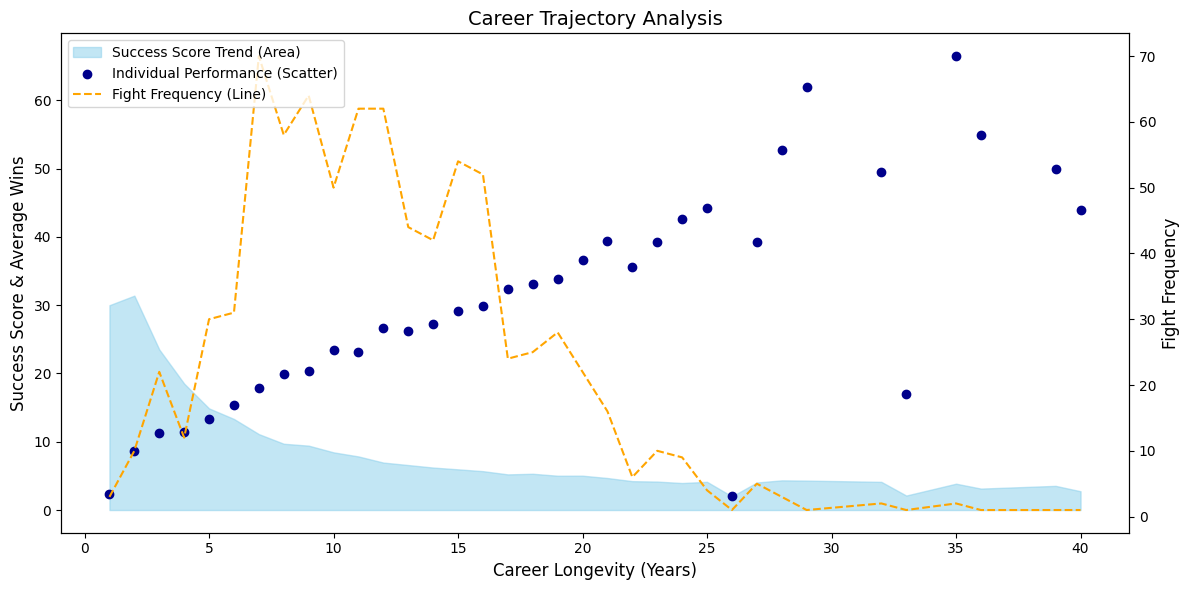

In [102]:
# Career longevity as the difference between 2024 (current year) and debut year
boxers_data['Career Longevity'] = 2024 - boxers_data['Debut']

# Success Score is defined as (Wins + Knockout %) / Career Longevity
boxers_data['Success Score'] = (boxers_data['Wins'] + boxers_data['Knockout, %']) / boxers_data['Career Longevity']

# "Career Longevity" for visualization
longevity_analysis = boxers_data.groupby('Career Longevity').agg({
    'Name': 'count',
    'Success Score': 'mean',
    'Wins': 'mean'
}).rename(columns={
    'Name': 'Fight Frequency',
    'Success Score': 'Average Success Score',
    'Wins': 'Average Wins'
}).reset_index()

fig, ax1 = plt.subplots(figsize=(12, 6))

# Area chart for Success Score Trend
ax1.fill_between(
    longevity_analysis['Career Longevity'],
    longevity_analysis['Average Success Score'],
    color='skyblue',
    alpha=0.5,
    label='Success Score Trend (Area)'
)

# Line chart for Fight Frequency
ax2 = ax1.twinx()
ax2.plot(
    longevity_analysis['Career Longevity'],
    longevity_analysis['Fight Frequency'],
    color='orange',
    label='Fight Frequency (Line)',
    linestyle='--'
)

# Scatter plot for Individual Performance Points (Average Wins)
ax1.scatter(
    longevity_analysis['Career Longevity'],
    longevity_analysis['Average Wins'],
    color='darkblue',
    label='Individual Performance (Scatter)',
    zorder=5
)

ax1.set_xlabel('Career Longevity (Years)', fontsize=12)
ax1.set_ylabel('Success Score & Average Wins', fontsize=12)
ax2.set_ylabel('Fight Frequency', fontsize=12)
plt.title('Career Trajectory Analysis', fontsize=14)

# Combining legends from both axes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
plt.legend(lines1 + lines2, labels1 + labels2, loc='upper left', fontsize=10)

plt.tight_layout()
plt.show()


<hr>

### Prediction

##### Predicting `Win Rate` with Random Forest Classifier

In [96]:
# Engineering Features
boxers_data['years_experience'] = 2024 - boxers_data['Debut']
boxers_data['fight_frequency'] = boxers_data['Total Fights'] / boxers_data['years_experience']
boxers_data['knockout_ratio'] = boxers_data.apply(lambda row: row['Wins By KO'] / row['Wins'] if row['Wins'] > 0 else 0, axis=1)
boxers_data['loss_rate'] = boxers_data.apply(lambda row: row['Losses'] / row['Total Fights'] if row['Total Fights'] > 0 else 0, axis=1)
boxers_data['draw_rate'] = boxers_data.apply(lambda row: row['Draws'] / row['Total Fights'] if row['Total Fights'] > 0 else 0, axis=1)

# 'Win Rate (%)' categories
bins = [0, 70, 85, 95, 100]
labels = ['Low', 'Medium', 'High', 'Very High']
boxers_data['win_rate_category'] = pd.cut(boxers_data['Win Rate (%)'], bins=bins, labels=labels, include_lowest=True)

# Features and Target
numeric_features = ['Age', 'Height', 'years_experience', 'fight_frequency', 'knockout_ratio', 'loss_rate', 'draw_rate']
categorical_features = ['Stance', 'Weight Division']
X = boxers_data[numeric_features + categorical_features]
y = boxers_data['win_rate_category']

# Preprocessing and Pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_features)
    ]
)

model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

# Optional: Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.963855421686747
Classification Report:
              precision    recall  f1-score   support

        High       0.98      0.99      0.98        93
         Low       0.00      0.00      0.00         3
      Medium       0.89      0.94      0.91        34
   Very High       1.00      1.00      1.00        36

    accuracy                           0.96       166
   macro avg       0.72      0.73      0.72       166
weighted avg       0.95      0.96      0.96       166

Confusion Matrix:
[[92  0  1  0]
 [ 0  0  3  0]
 [ 2  0 32  0]
 [ 0  0  0 36]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



##### Calculate importance for actual features


In [98]:
feature_names = (numeric_features +
                [f"{feat}_{val}" for feat, vals in
                    zip(categorical_features,
                        model.named_steps['preprocessor']
                        .named_transformers_['cat']
                        .categories_)
                    for val in vals[1:]])

importances = model.named_steps['classifier'].feature_importances_

feature_importance = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values('importance', ascending=True)

print("Feature Importance:")
print(feature_importance)

Feature Importance:
                                feature  importance
16        Weight Division_Minimumweight    0.000823
12         Weight Division_Jr Flyweight    0.002443
10            Weight Division_Flyweight    0.002616
13    Weight Division_Light Heavyweight    0.003258
19      Weight Division_Super Flyweight    0.003329
11          Weight Division_Heavyweight    0.003910
20    Weight Division_Super Lightweight    0.004127
8         Weight Division_Cruiserweight    0.004319
14          Weight Division_Lightweight    0.004344
18  Weight Division_Super Featherweight    0.004477
17   Weight Division_Super Bantamweight    0.004529
9         Weight Division_Featherweight    0.004551
21   Weight Division_Super Middleweight    0.004660
22   Weight Division_Super Welterweight    0.004811
15         Weight Division_Middleweight    0.005666
7                       Stance_southpaw    0.008317
23         Weight Division_Welterweight    0.010930
1                                Height    0

##### Vizualizing Feature Importance

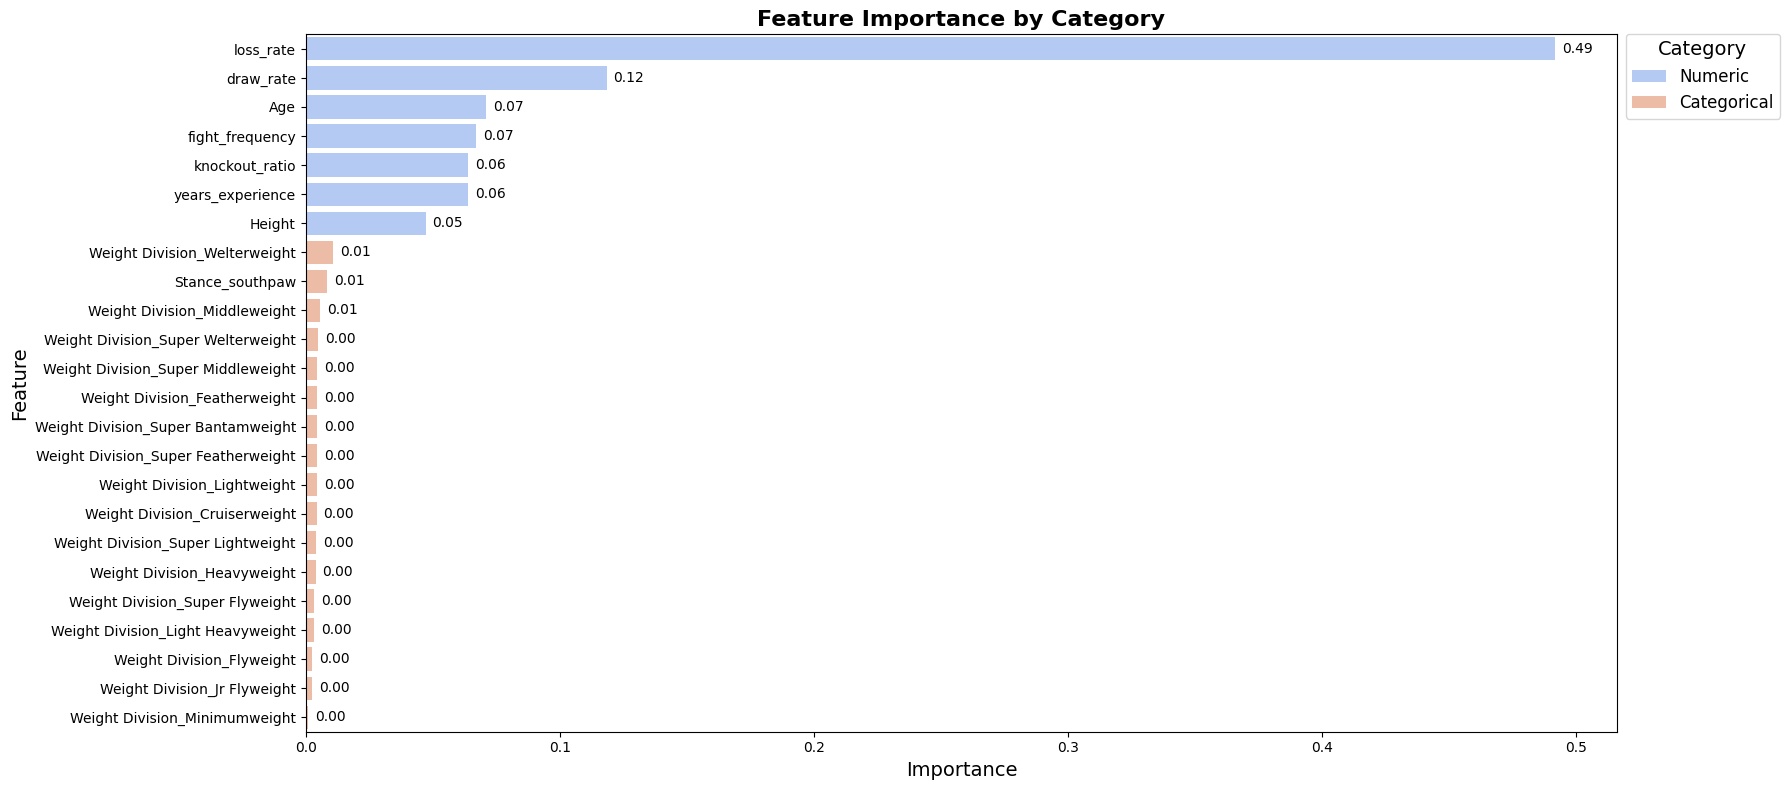

In [101]:
feature_importance['category'] = [
    'Numeric' if feature in numeric_features else 'Categorical'
    for feature in feature_importance['feature']
]

plt.figure(figsize=(18, 8))
bar_plot = sns.barplot(
    x="importance",
    y="feature",
    hue="category",
    data=feature_importance.sort_values(by="importance", ascending=False),
    palette="coolwarm"
)

for container in bar_plot.containers:
    bar_plot.bar_label(
        container,
        fmt="%.2f",
        label_type="edge",
        fontsize=10,
        padding=5
    )

plt.title("Feature Importance by Category", fontsize=16, fontweight="bold")
plt.xlabel("Importance", fontsize=14)
plt.ylabel("Feature", fontsize=14)
plt.legend(
    title="Category",
    fontsize=12,
    title_fontsize=14,
    loc="center left",
    bbox_to_anchor=(1, 0.94)
)

plt.tight_layout()
plt.show()


## Summary